In [7]:
def gerar_relatorio(y_test, y_pred):
    acuracia = accuracy_score(y_test, y_pred)
    print("Acurácia:", acuracia)

    # Calculando precisão, recall e F1-score
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title('Matriz de Confusão')
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.show()

# Importação

In [8]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import datasets
import seaborn as sns

# Carregamento da base de dados

In [9]:
digits = datasets.load_digits()
print(len(digits.data))

1797


In [10]:
acuracias = []

# Algoritmo SVM

In [11]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-100], digits.target[:-100])

SVC(C=100.0, gamma=0.001)

Acurácia: 0.98
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       0.91      1.00      0.95        10
           9       1.00      1.00      1.00        10

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



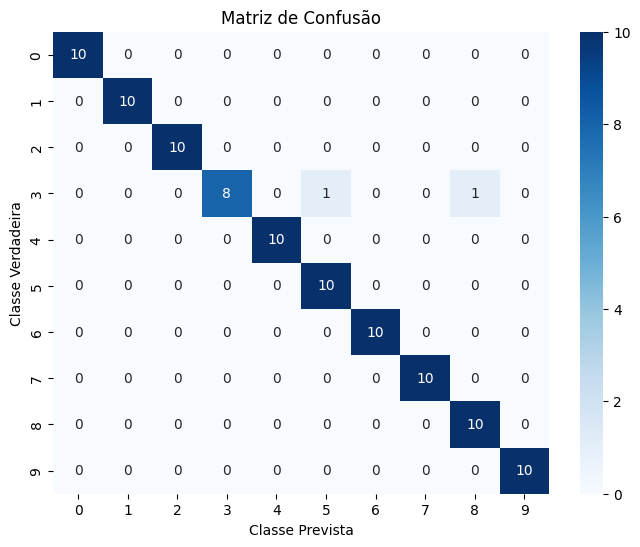

In [12]:
predictions = clf.predict(digits.data[-100:])
acuracias.append(accuracy_score(digits.target[-100:], predictions))
gerar_relatorio(digits.target[-100:], predictions)

# Árvore de Decisão

In [13]:
clf = DecisionTreeClassifier()
clf.fit(digits.data[:-100], digits.target[:-100])

DecisionTreeClassifier()

Acurácia: 0.85
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10
           3       0.75      0.30      0.43        10
           4       0.77      1.00      0.87        10
           5       0.75      0.60      0.67        10
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00        10
           8       0.73      0.80      0.76        10
           9       0.77      1.00      0.87        10

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.83       100
weighted avg       0.85      0.85      0.83       100



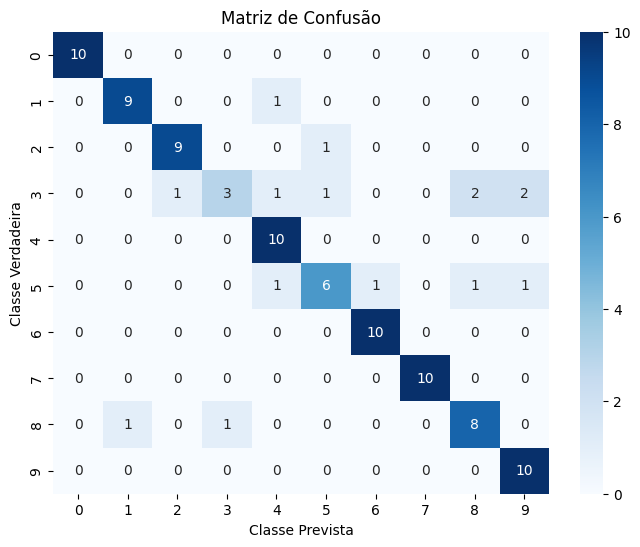

In [14]:
predictions = clf.predict(digits.data[-100:])
acuracias.append(accuracy_score(digits.target[-100:], predictions))
gerar_relatorio(digits.target[-100:], predictions)

# Random Forest

In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(digits.data[:-100], digits.target[:-100])

RandomForestClassifier(random_state=42)

Acurácia: 0.95
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      0.60      0.75        10
           4       1.00      1.00      1.00        10
           5       0.83      1.00      0.91        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       0.82      0.90      0.86        10
           9       1.00      1.00      1.00        10

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.96      0.95      0.95       100



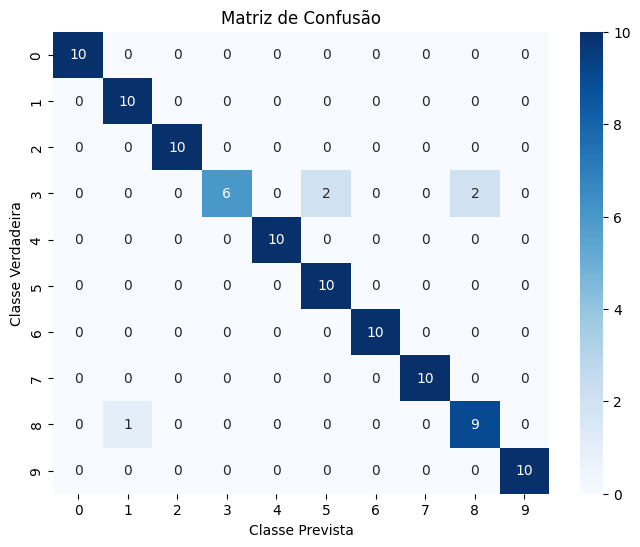

In [16]:
predictions = clf.predict(digits.data[-100:])
acuracias.append(accuracy_score(digits.target[-100:], predictions))
gerar_relatorio(digits.target[-100:], predictions)

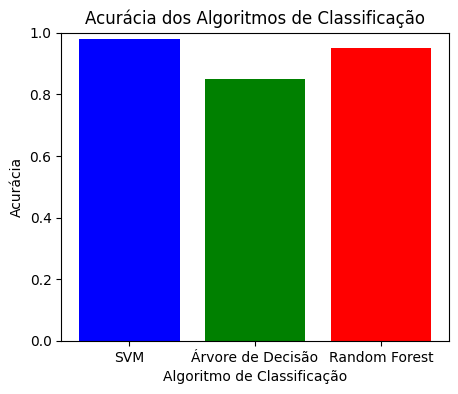

In [17]:
plt.figure(figsize=(5, 4))
plt.bar(['SVM', 'Árvore de Decisão', 'Random Forest'], acuracias, color=['blue', 'green', 'red'])
plt.xlabel('Algoritmo de Classificação')
plt.ylabel('Acurácia')
plt.title('Acurácia dos Algoritmos de Classificação')
plt.ylim(0, 1)
plt.show()